
# What is PyTorch?

It’s a Python based scientific computing package targeted at two sets of audiences:

-  Tensorial library that uses the power of GPUs
-  A deep learning research platform that provides maximum flexibility and speed

## Import the library

In [1]:
import torch  # <Ctrl> / <Shift> + <Return>

## Getting help in Jupyter

In [2]:
torch.sq  # <Tab>

AttributeError: module 'torch' has no attribute 'sq'

In [3]:
# What about all `*Tensor`s?
# Press <esc> to get out of help
torch.*Tensor?

torch.BFloat16Tensor
torch.BoolTensor
torch.ByteTensor
torch.CharTensor
torch.DoubleTensor
torch.FloatTensor
torch.HalfTensor
torch.IntTensor
torch.LongTensor
torch.ShortTensor
torch.Tensor

In [4]:
torch.nn.Module()  # <Shift>+<Tab>

Module()

In [5]:
# Annotate your functions / classes!
torch.nn.Module?

Init signature: torch.nn.Module()
Docstring:     
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self):
            super(Model, self).__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.
Init docstring: Initializes internal Module state, shared by both nn.Module and ScriptModule.
File:           c:\users\camilozamora\documents\dev\python\nyu deep learning\.dl-venv\lib\site-packages\torch\nn\modules\module.py
Type: 

In [6]:
torch.nn.Module??

m extra_repr.split('\n')
        child_lines = []
        for key, module in self._modules.items():
            mod_str = repr(module)
            mod_str = _addindent(mod_str, 2)
            child_lines.append('(' + key + '): ' + mod_str)
        lines = extra_lines + child_lines

        main_str = self._get_name() + '('
        if lines:
            # simple one-liner info, which most builtin Modules will use
            if len(extra_lines) == 1 and not child_lines:
                main_str += extra_lines[0]
            else:
                main_str += '\n  ' + '\n  '.join(lines) + '\n'

        main_str += ')'
        return main_str

    def __dir__(self):
        module_attrs = dir(self.__class__)
        attrs = list(self.__dict__.keys())
        parameters = list(self._parameters.keys())
        modules = list(self._modules.keys())
        buffers = list(self._buffers.keys())
        keys = module_attrs + attrs + parameters + modules + buffers

        # Eliminate attrs that a

## Dropping to Bash: magic!

In [7]:
# List all the files in the current directory
!ls -lh

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [8]:
%%bash
# List all the files but with cleaner outputs for readability
for f in $(ls *.*); do
    echo $(wc -l $f)
done

1 NOTAS.md
6 README.md
34 requirements.txt


In [9]:
# Getting some general help
%magic

l time: 1.37
      Out[3]: 499999500000L
    
      In [4]: %time print 'hello world'
      hello world
      CPU times: user 0.00 s, sys: 0.00 s, total: 0.00 s
      Wall time: 0.00
    
      Note that the time needed by Python to compile the given expression
      will be reported if it is more than 0.1s.  In this example, the
      actual exponentiation is done by Python at compilation time, so while
      the expression can take a noticeable amount of time to compute, that
      time is purely due to the compilation:
    
      In [5]: %time 3**9999;
      CPU times: user 0.00 s, sys: 0.00 s, total: 0.00 s
      Wall time: 0.00 s
    
      In [6]: %time 3**999999;
      CPU times: user 0.00 s, sys: 0.00 s, total: 0.00 s
      Wall time: 0.00 s
      Compiler : 0.78 s
%%timeit:
    Time execution of a Python statement or expression
    
    Usage, in line mode:
      %timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] statement
    or in cell mode:
      %%timeit [-n<N> -r<R> [-t|-c] -q -p<

## Python native data types

Python has many native datatypes. Here are the important ones:

 - **Booleans** are either `True` or `False`.
 - **Numbers** can be integers (1 and 2), floats (1.1 and 1.2), fractions (1/2 and 2/3), or even complex numbers.
 - **Strings** are sequences of Unicode characters, e.g. an html document.
 - **Lists** are ordered sequences of values.
 - **Tuples** are ordered, immutable sequences of values.
 - **Sets** are unordered bags of values.
 - **Dictionaries** are unordered bags of key-value pairs.
 
See [here](http://www.diveintopython3.net/native-datatypes.html) for a complete overview.

### More resources

 1. Brief Python introduction [here](https://learnxinyminutes.com/docs/python3/).
 2. Full Python tutorial [here](https://docs.python.org/3/tutorial/).
 3. A Whirlwind Tour of Python [here](https://github.com/jakevdp/WhirlwindTourOfPython).
 4. Python Data Science Handbook [here](https://github.com/jakevdp/PythonDataScienceHandbook).

## Torch!

In [10]:
# Generate a tensor of size 2x3x4
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

In [11]:
# Get the size of the tensor
t.size()

torch.Size([2, 3, 4])

In [12]:
# t.size() is a classic tuple =>
print('t size:', ' \u00D7 '.join(map(str, t.size())))

t size: 2 × 3 × 4


In [13]:
# prints dimensional space and sub-dimensions
print(f'point in a {t.numel()} dimensional space')
print(f'organised in {t.dim()} sub-dimensions')

point in a 24 dimensional space
organised in 3 sub-dimensions


In [14]:
t

tensor([[[-2.5020e+22,  7.8333e-43, -2.4984e+22,  7.8333e-43],
         [-1.6612e+22,  7.8333e-43, -1.6612e+22,  7.8333e-43],
         [-2.5017e+22,  7.8333e-43, -2.5017e+22,  7.8333e-43]],

        [[-2.4950e+22,  7.8333e-43, -2.4926e+22,  7.8333e-43],
         [-1.6610e+22,  7.8333e-43, -1.6623e+22,  7.8333e-43],
         [-1.6623e+22,  7.8333e-43, -1.6623e+22,  7.8333e-43]]])

In [15]:
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
t.random_(10)

tensor([[[5., 4., 6., 7.],
         [5., 7., 6., 1.],
         [8., 3., 6., 7.]],

        [[5., 9., 3., 1.],
         [4., 0., 2., 7.],
         [8., 2., 5., 5.]]])

In [16]:
t

tensor([[[5., 4., 6., 7.],
         [5., 7., 6., 1.],
         [8., 3., 6., 7.]],

        [[5., 9., 3., 1.],
         [4., 0., 2., 7.],
         [8., 2., 5., 5.]]])

In [17]:
# This resizes the tensor permanently 
r = torch.Tensor(t)
r.resize_(3, 8)
r

tensor([[5., 4., 6., 7., 5., 7., 6., 1.],
        [8., 3., 6., 7., 5., 9., 3., 1.],
        [4., 0., 2., 7., 8., 2., 5., 5.]])

In [18]:
# As you can see zero_ would replace r with 0's which was originally filled with integers
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [19]:
t

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [20]:
# This *is* important, sigh...
s = r.clone()

In [21]:
# In-place fill of 1's
s.fill_(1)
s

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [22]:
# Because we cloned r, even though we did an in-place operation, this doesn't affect r
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

## Vectors (1D Tensors)

In [23]:
# Creates a 1D tensor of integers 1 to 4
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [24]:
# Print number of dimensions (1D) and size of tensor
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


In [25]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [26]:
# Element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [27]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [28]:
# In-place replacement of random number from 0 to 10
x = torch.Tensor(5).random_(10)
x

tensor([1., 0., 5., 9., 4.])

In [29]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 1.0, last: 4.0


In [30]:
# Extract sub-Tensor [from:to)
x[1:2 + 1]

tensor([0., 5.])

In [31]:
v

tensor([1., 2., 3., 4.])

In [32]:
# Create a tensor with integers ranging from 1 to 5, excluding 5
v = torch.arange(1, 4 + 1)
v

tensor([1, 2, 3, 4])

In [33]:
# Square all elements in the tensor
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


## Matrices (2D Tensors)

In [34]:
# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [89]:
torch.Tensor(2,4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [36]:
m.dim()

2

In [37]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [38]:
# Returns the total number of elements, hence num-el (number of elements)
m.numel()

8

In [39]:
# Indexing row 0, column 2 (0-indexed)
m[0][2]

tensor(3.)

In [40]:
# Indexing row 0, column 2 (0-indexed)
m[0, 2]

tensor(3.)

In [41]:
# Indexing column 1, all rows (returns size 2)
m[:, 1]

tensor([5., 2.])

In [42]:
# Indexing column 1, all rows (returns size 2x2)
m[:, [1]]

tensor([[5.],
        [2.]])

In [43]:
# Indexes row 0, all columns (returns 1x4)
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [44]:
# Indexes row 0, all columns (returns size 4)
m[0, :]

tensor([2., 5., 3., 7.])

In [45]:
# Create tensor of numbers from 1 to 5 (excluding 5)
v = torch.arange(1., 4 + 1)
v

tensor([1., 2., 3., 4.])

In [46]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [47]:
# Scalar product
m @ v

tensor([49., 47.])

In [48]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[[0], :] @ v

tensor([49.])

In [49]:
# Calculated by 
m[[1], :] @ v

tensor([47.])

In [50]:
# Add a random tensor of size 2x4 to m
m + torch.rand(2, 4)

tensor([[2.5720, 5.7814, 3.6719, 7.7526],
        [4.0888, 2.1054, 1.0633, 9.7022]])

In [51]:
# Subtract a random tensor of size 2x4 to m
m - torch.rand(2, 4)

tensor([[1.3590, 4.4232, 2.5727, 6.3596],
        [3.9438, 1.1861, 0.9436, 8.3984]])

In [52]:
# Multiply a random tensor of size 2x4 to m
m * torch.rand(2, 4)

tensor([[1.6745, 0.3070, 0.9669, 1.8104],
        [2.0077, 1.9890, 0.5493, 3.5292]])

In [53]:
# Divide m by a random tensor of size 2x4
m / torch.rand(2, 4)

tensor([[ 5.0816,  5.1456,  8.2114, 13.5079],
        [ 4.3356,  8.3981,  8.8546, 51.8948]])

In [54]:
m.size()

torch.Size([2, 4])

In [55]:
# Transpose tensor m, which is essentially 2x4 to 4x2
m.t()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [56]:
# Same as
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

## Constructors

In [57]:
# Create tensor from 3 to 8, with each having a space of 1
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [58]:
# Create tensor from 5.7 to -2.1 with each having a space of -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [59]:
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and steps=20
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [60]:
# Create a tensor filled with 0's
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [61]:
# Create a tensor filled with 1's
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [62]:
# Create a tensor with the diagonal filled with 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [90]:
# Set default plots
from repo.res.plot_lib import set_default
from matplotlib import pyplot as plt
set_default()

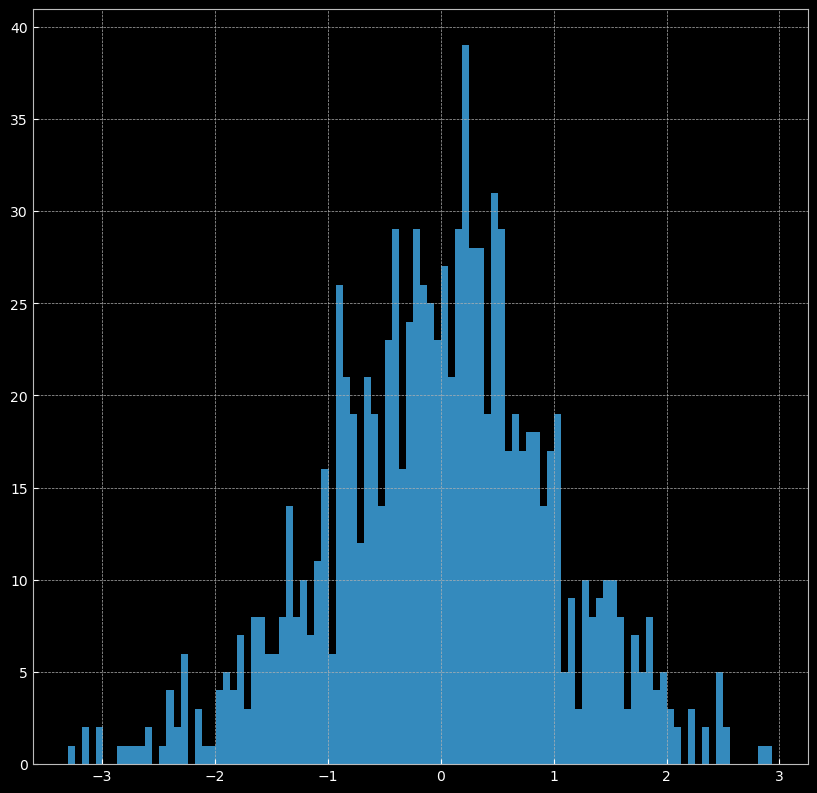

In [91]:
# Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100);

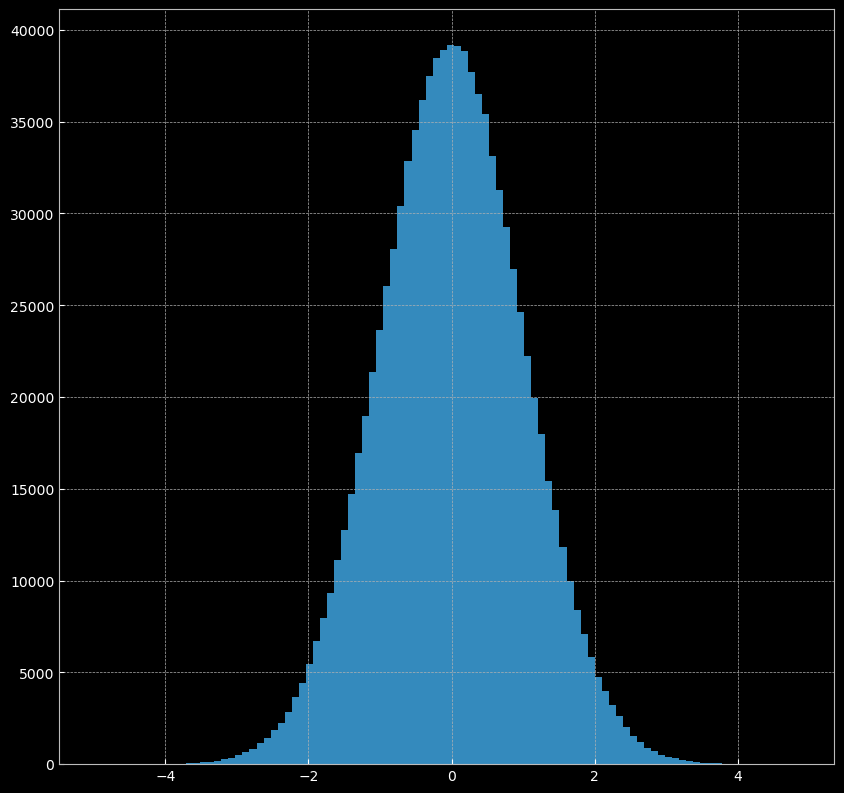

In [92]:
plt.hist(torch.randn(10**6).numpy(), 100);  # how much does this chart weight?
# use rasterized=True for SVG/EPS/PDF!

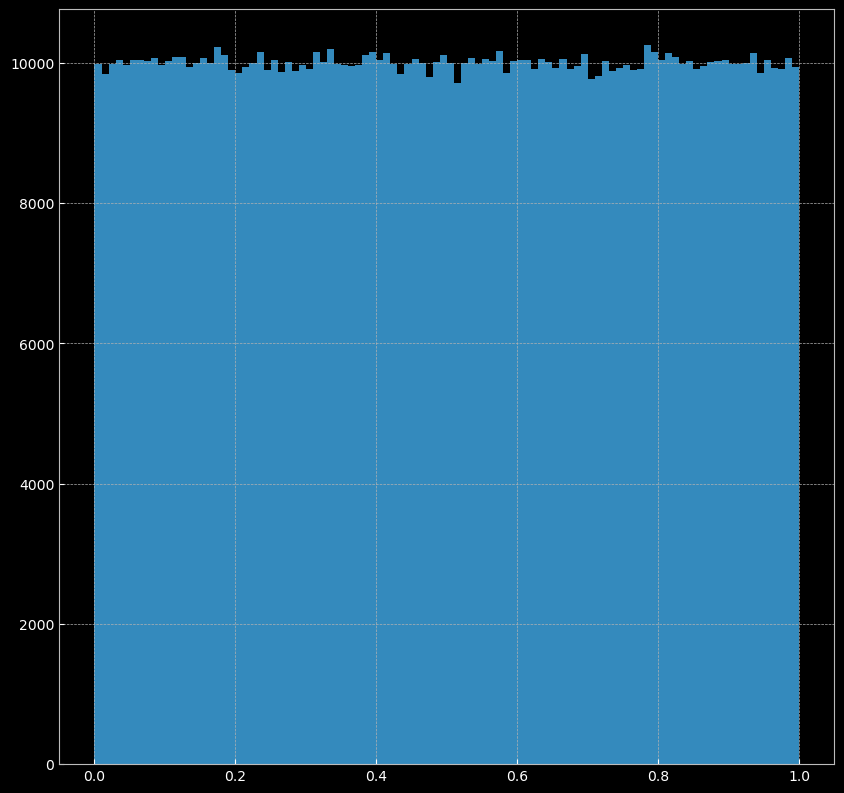

In [93]:
plt.hist(torch.rand(10**6).numpy(), 100);

## Casting

In [67]:
# Helper to get what kind of tensor types
torch.*Tensor?

torch.BFloat16Tensor
torch.BoolTensor
torch.ByteTensor
torch.CharTensor
torch.DoubleTensor
torch.FloatTensor
torch.HalfTensor
torch.IntTensor
torch.LongTensor
torch.ShortTensor
torch.Tensor

In [68]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [69]:
# This is basically a 64 bit float tensor
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [70]:
# This creates a tensor of type int8
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [71]:
# Move your tensor to GPU device 0 if there is one (first GPU in the system)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [72]:
# Converts tensor to numpy array
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [73]:
# In-place fill of column 0 and row 0 with value -1
m_np[0, 0] = -1
m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [74]:
m

tensor([[-1.,  5.,  3.,  7.],
        [ 4.,  2.,  1.,  9.]])

In [75]:
# Create a tensor of integers ranging from 0 to 4
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4], dtype=torch.int32)


In [76]:
# In-place multiplication of all elements by 2 for tensor n
# Because n is essentiall n_np, not a clone, this affects n_np
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

## More fun

In [77]:
# Creates two tensor of size 1x4
a = torch.Tensor([[1, 2, 3, 4]])
b = torch.Tensor([[5, 6, 7, 8]])
print(a.size(), b)

torch.Size([1, 4]) tensor([[5., 6., 7., 8.]])


In [78]:
# Concatenate on axis 0, so you get 2x4
torch.cat((a, b), 0)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])

In [79]:
# Concatenate on axis 1, so you get 1x8
torch.cat((a, b), 1)

tensor([[1., 2., 3., 4., 5., 6., 7., 8.]])

## Much more

There's definitely much more, but this was the basics about `Tensor`s fun.

*Torch* full API should be read at least once.
Hence, go [here](https://pytorch.org/docs/stable/index.html).
You'll find 100+ `Tensor` operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described.